In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [161]:
## Loading the data
path = "C:/Users/David/OneDrive - Grand Canyon University/DSC540/DataSets/"
file = "Mall_Customers.csv"
data = pd.read_csv(path+file)

In [162]:
## Encoding categorical values
data["Gender"] = data["Gender"].astype('category')
data["Gender_Category"] = data["Gender"].cat.codes

In [163]:
##Removing id and Gender from data frame and setting to X
##Note for Gender_Category, Male=1, Female=0
X = data.drop(['CustomerID', 'Gender'],
              axis=1)

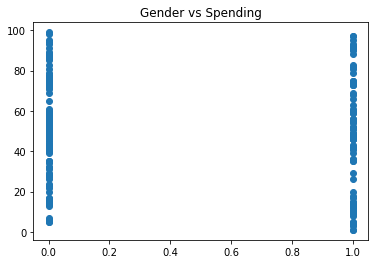

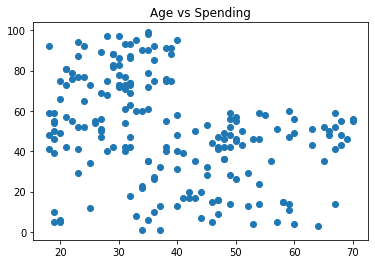

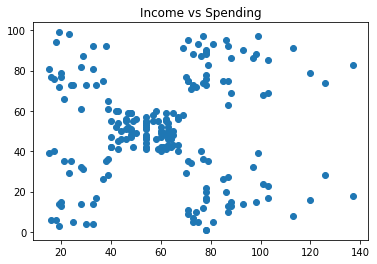

In [164]:
##Visualizing Raw Data
plt.scatter(X['Gender_Category'], X['Spending Score (1-100)'])
plt.title("Gender vs Spending")
plt.show()
plt.scatter(X['Age'], X['Spending Score (1-100)'])
plt.title("Age vs Spending")
plt.show()
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.title("Income vs Spending")
plt.show()

In [165]:
##Getting value counts for gender
X['Gender_Category'].value_counts()

0    112
1     88
Name: Gender_Category, dtype: int64

In [172]:
##Data preprocessing, scaling data using minmax
scaler = MinMaxScaler()

scaler.fit(X[['Age']])
X['Age'] = scaler.transform(X[['Age']])
scaler.fit(X[['Annual Income (k$)']])
X['Annual Income (k$)'] = scaler.transform(X[['Annual Income (k$)']])
scaler.fit(X[['Spending Score (1-100)']])
X['Spending Score (1-100)'] = scaler.transform(X[['Spending Score (1-100)']])

print(X.tail())

          Age  Annual Income (k$)  Spending Score (1-100)  Gender_Category  \
195  0.326923            0.860656                0.795918                0   
196  0.519231            0.909836                0.275510                0   
197  0.269231            0.909836                0.744898                1   
198  0.269231            1.000000                0.173469                1   
199  0.230769            1.000000                0.836735                1   

     age_cluster  income_cluster  
195            1               1  
196            3               3  
197            1               1  
198            2               3  
199            1               1  


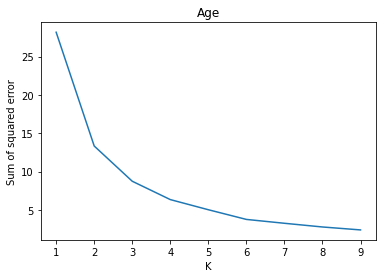

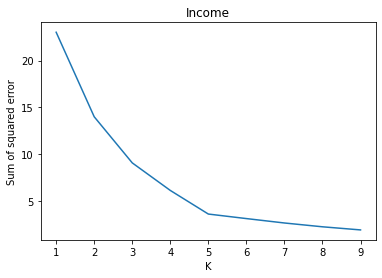

In [167]:
##Finding best number of clusters using elbow method for each relationship
sse_age = []
sse_income = []
k_range = range(1, 10)

for k in k_range:
    kmeans_age = KMeans(n_clusters=k)
    kmeans_income = KMeans(n_clusters=k)
    kmeans_age.fit(X[['Age', 'Spending Score (1-100)']])
    sse_age.append(kmeans_age.inertia_)
    kmeans_income.fit(X[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse_income.append(kmeans_income.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Age')
plt.plot(k_range,sse_age)
plt.show()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Income')
plt.plot(k_range,sse_income)
plt.show()

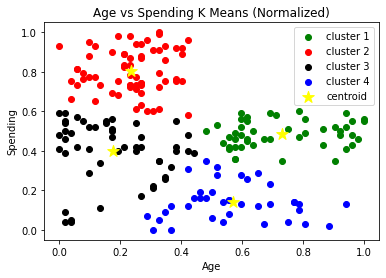

In [168]:
kmeans_age = KMeans(n_clusters=4)
label_age = kmeans_age.fit_predict(X[['Age', 'Spending Score (1-100)']])

## Adding cluster value to dataframe
X['age_cluster'] = label_age

age_cluster_1 = X[X.age_cluster == 0]
age_cluster_2 = X[X.age_cluster == 1]
age_cluster_3 = X[X.age_cluster == 2]
age_cluster_4 = X[X.age_cluster == 3]
plt.scatter(age_cluster_1.Age,
            age_cluster_1['Spending Score (1-100)'],
            color='green',
            label='cluster 1')
plt.scatter(age_cluster_2.Age,
            age_cluster_2['Spending Score (1-100)'],
            color='red',
            label='cluster 2')
plt.scatter(age_cluster_3.Age,
            age_cluster_3['Spending Score (1-100)'],
            color='black',
            label='cluster 3')
plt.scatter(age_cluster_4.Age,
            age_cluster_4['Spending Score (1-100)'],
            color='blue',
            label='cluster 4')
plt.scatter(kmeans_age.cluster_centers_[:,0],
            kmeans_age.cluster_centers_[:,1],
            color='yellow',
            marker='*',
            s=150,
            label='centroid')
plt.title("Age vs Spending K Means (Normalized)")
plt.xlabel("Age")
plt.ylabel("Spending")
plt.legend()
plt.show()

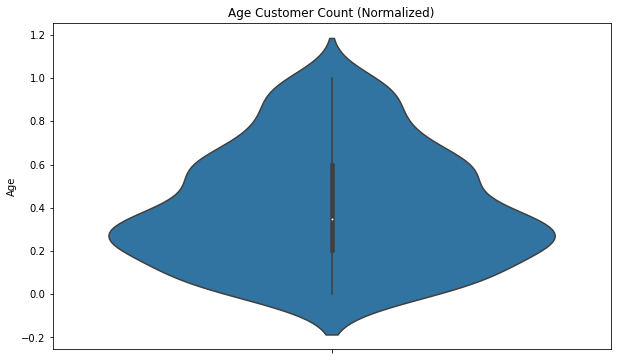

In [169]:
plt.figure(figsize=(10,6))
plt.title("Age Customer Count (Normalized)")
sns.axes_style("dark")
sns.violinplot(y=X["Age"])
plt.show()

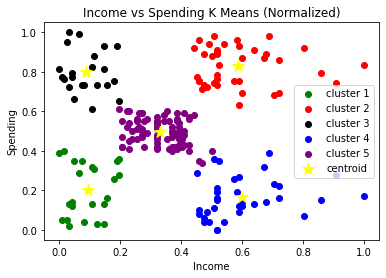

In [170]:
kmeans_income = KMeans(n_clusters=5)
label_income = kmeans_income.fit_predict(X[['Annual Income (k$)', 'Spending Score (1-100)']])

## Adding cluster value to dataframe
X['income_cluster'] = label_income

income_cluster_1 = X[X.income_cluster == 0]
income_cluster_2 = X[X.income_cluster == 1]
income_cluster_3 = X[X.income_cluster == 2]
income_cluster_4 = X[X.income_cluster == 3]
income_cluster_5 = X[X.income_cluster == 4]

plt.scatter(income_cluster_1['Annual Income (k$)'],
            income_cluster_1['Spending Score (1-100)'],
            color='green',
            label='cluster 1')
plt.scatter(income_cluster_2['Annual Income (k$)'],
            income_cluster_2['Spending Score (1-100)'],
            color='red',
            label='cluster 2')
plt.scatter(income_cluster_3['Annual Income (k$)'],
            income_cluster_3['Spending Score (1-100)'],
            color='black',
            label='cluster 3')
plt.scatter(income_cluster_4['Annual Income (k$)'],
            income_cluster_4['Spending Score (1-100)'],
            color='blue',
            label='cluster 4')
plt.scatter(income_cluster_5['Annual Income (k$)'],
            income_cluster_5['Spending Score (1-100)'],
            color='purple',
            label='cluster 5')
plt.scatter(kmeans_income.cluster_centers_[:,0],
            kmeans_income.cluster_centers_[:,1],
            color='yellow',
            marker='*',
            s=150,
            label='centroid')
plt.title("Income vs Spending K Means (Normalized)")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.legend()
plt.show()

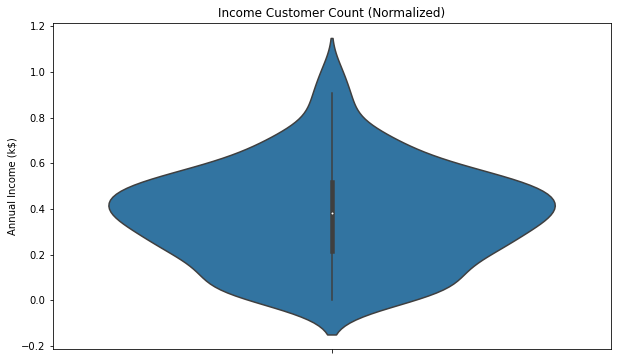

In [171]:
plt.figure(figsize=(10,6))
plt.title("Income Customer Count (Normalized)")
sns.axes_style("dark")
sns.violinplot(y=X["Annual Income (k$)"])
plt.show()